# Análise I

In [64]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

In [3]:
df_vendas = pd.read_excel('../DataSet/DataSetNovo.xlsx')

In [71]:
# Função que gera gráficos x y
def gera_graficos(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16, 12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, loc='left', fontsize=18)
    sns.lineplot(x=x, y=y1, data=dataset)
    ax = plt.subplot(3, 1, 2)
    sns.lineplot(x=x, y=y2, data=dataset)
    ax = plt.subplot(3, 1, 3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

## Pedidos por país

In [4]:
# Quantidade de pedidos realizados por cada país
df_paises = df_vendas.groupby('Country')['BillNo'].count().reset_index()
display(df_paises.sort_values(by='BillNo', ascending=False, ignore_index=True))

,Country,BillNo
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,Spain,2485
4,Netherlands,2363
5,Belgium,2031
6,Switzerland,1842
7,Portugal,1462
8,Australia,1185
9,Norway,1072


## Pedidos por Vendedor

In [66]:
# Quantidade de pedidos realizados por cada Vendedor
# Apenas os 15 primeiros
df_customers = df_vendas.groupby('CustomerID')['BillNo'].count().reset_index()
df_customers.sort_values(by='BillNo', ascending=False, ignore_index=True, inplace=True)
df_customers.head(15)

,CustomerID,BillNo
0,17841,7847
1,14096,5111
2,12748,4596
3,14606,2700
4,15311,2379
5,14646,2080
6,13089,1818
7,13263,1677
8,14298,1637
9,15039,1502


## Análise de vendas, aumento e aceleração da mesma

In [57]:
df_vendas_aumento = df_vendas.groupby('Date')['BillNo'].count().reset_index()
df_vendas_aumento['Aumento'] = df_vendas_aumento['BillNo'].diff()
df_vendas_aumento['Aceleracao'] = df_vendas_aumento['Aumento'].diff()
df_vendas_aumento_2010 = df_vendas_aumento.loc[df_vendas_aumento['Date'] <= '2010-12-12']

df_vendas_aumento_2011 = df_vendas_aumento.loc[(df_vendas_aumento['Date'] > '2010-12-12')
                                              & (df_vendas_aumento['Date'] <= '2011-12-12')]

### Análise de 2010

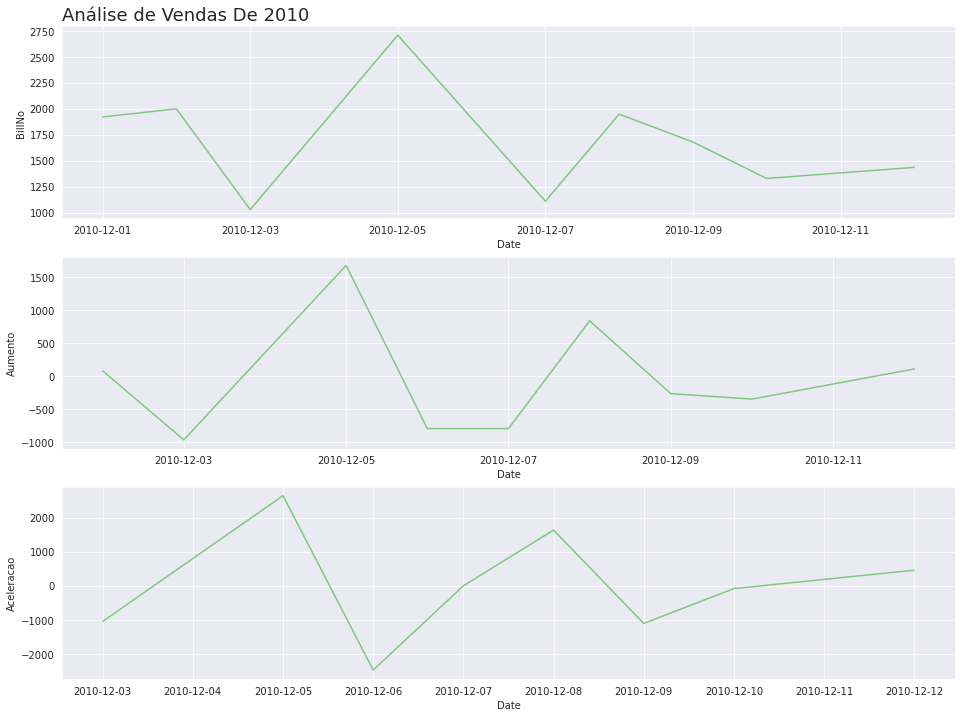

In [61]:
gera_graficos(df_vendas_aumento_2010['Date'], 
            df_vendas_aumento_2010['BillNo'],
            df_vendas_aumento_2010['Aumento'],
            df_vendas_aumento_2010['Aceleracao'],
            df_vendas_aumento_2010,
            'Análise de Vendas De 2010')

### Análise de 2011

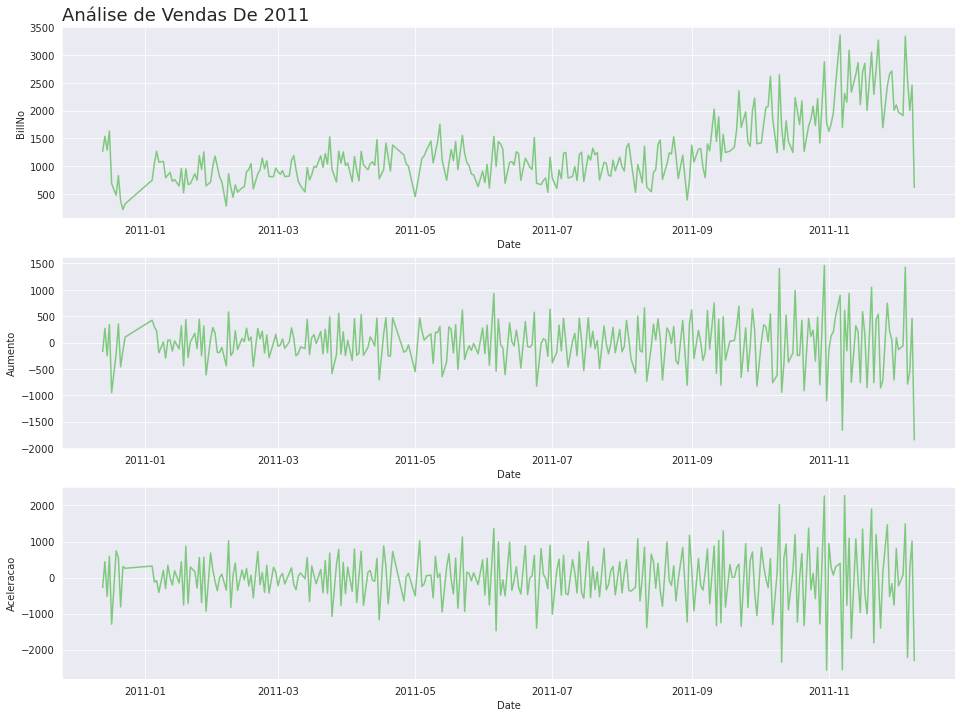

In [63]:
gera_graficos(df_vendas_aumento_2011['Date'], 
            df_vendas_aumento_2011['BillNo'],
            df_vendas_aumento_2011['Aumento'],
            df_vendas_aumento_2011['Aceleracao'],
            df_vendas_aumento_2011,
            'Análise de Vendas De 2011')

## Análise de Autocorrelação

### Análise de 2010

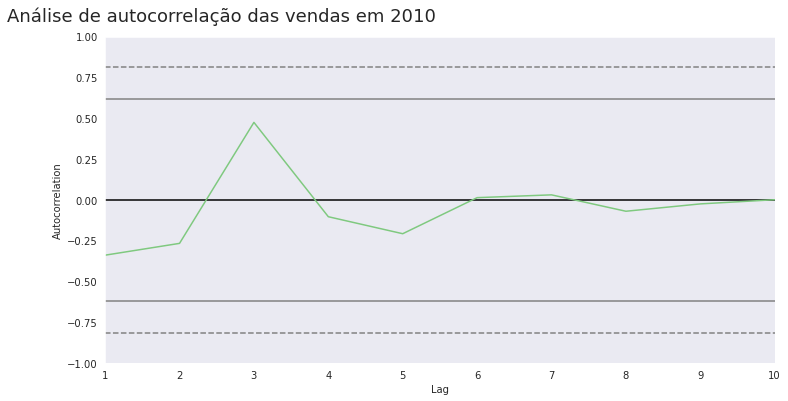

In [98]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Análise de autocorrelação das vendas em 2010', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_vendas_aumento_2010['BillNo'])
ax = ax

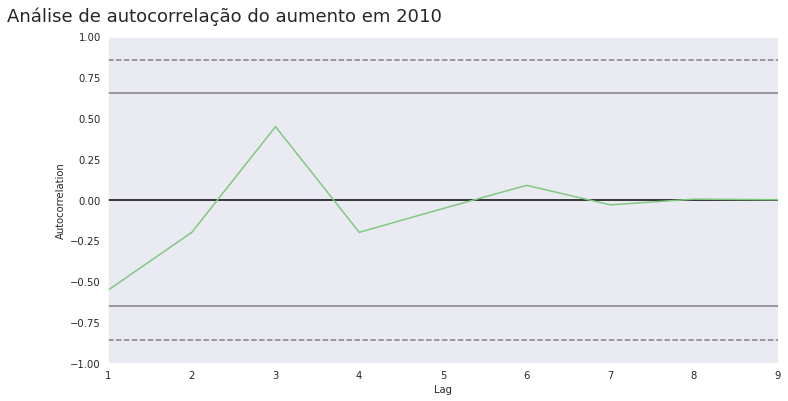

In [100]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Análise de autocorrelação do aumento em 2010', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_vendas_aumento_2010['Aumento'][1:])
ax = ax

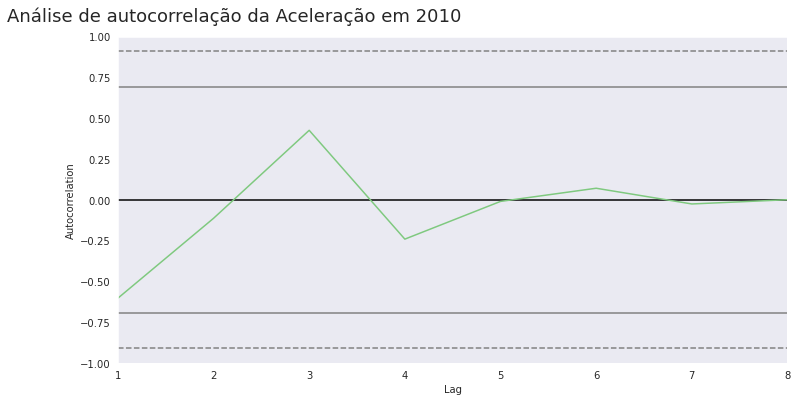

In [102]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Análise de autocorrelação da Aceleração em 2010', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_vendas_aumento_2010['Aceleracao'][2:])
ax = ax

## Análise de 2011

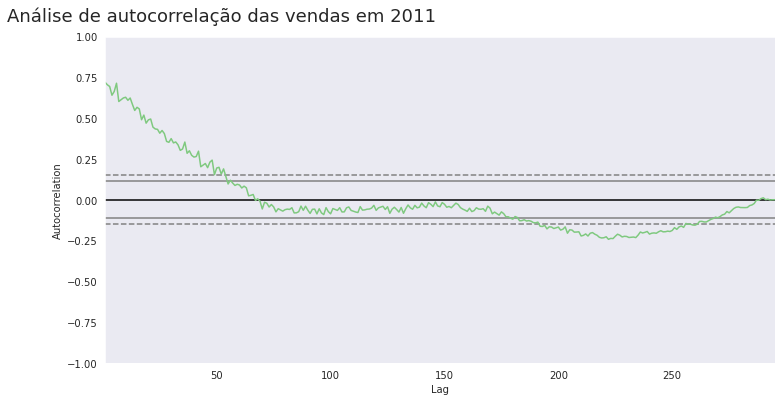

In [106]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Análise de autocorrelação das vendas em 2011', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_vendas_aumento_2011['BillNo'])
ax = ax

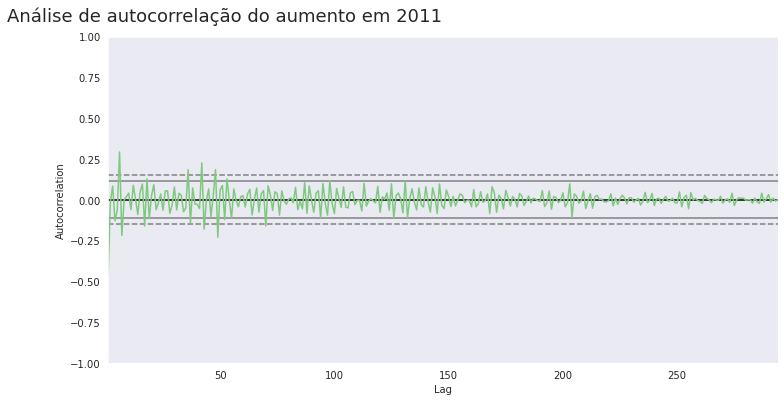

In [103]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Análise de autocorrelação do aumento em 2011', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_vendas_aumento_2011['Aumento'][1:])
ax = ax

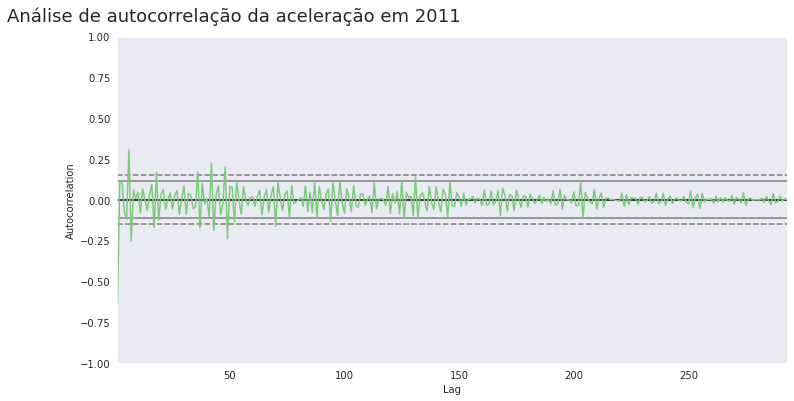

In [105]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Análise de autocorrelação da aceleração em 2011', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_vendas_aumento_2011['Aceleracao'][2:])
ax = ax